# 1 Display original data

In [6]:
rm(list=ls())
library(stringr)
setwd(dir = "~/Desktop/UW-Madion 学习/628/Module2/")
bodyfat=read.csv('BodyFat.csv')
head(as.matrix(bodyfat))
summary(bodyfat)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


      IDNO           BODYFAT         DENSITY           AGE       
 Min.   :  1.00   Min.   : 0.00   Min.   :0.995   Min.   :22.00  
 1st Qu.: 63.75   1st Qu.:12.80   1st Qu.:1.041   1st Qu.:35.75  
 Median :126.50   Median :19.00   Median :1.055   Median :43.00  
 Mean   :126.50   Mean   :18.94   Mean   :1.056   Mean   :44.88  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00  
 Max.   :252.00   Max.   :45.10   Max.   :1.109   Max.   :81.00  
     WEIGHT          HEIGHT        ADIPOSITY          NECK      
 Min.   :118.5   Min.   :29.50   Min.   :18.10   Min.   :31.10  
 1st Qu.:159.0   1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40  
 Median :176.5   Median :70.00   Median :25.05   Median :38.00  
 Mean   :178.9   Mean   :70.15   Mean   :25.44   Mean   :37.99  
 3rd Qu.:197.0   3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42  
 Max.   :363.1   Max.   :77.75   Max.   :48.90   Max.   :51.20  
     CHEST           ABDOMEN            HIP            THIGH      
 Min.   : 79.30 

#### Check the Boxplot

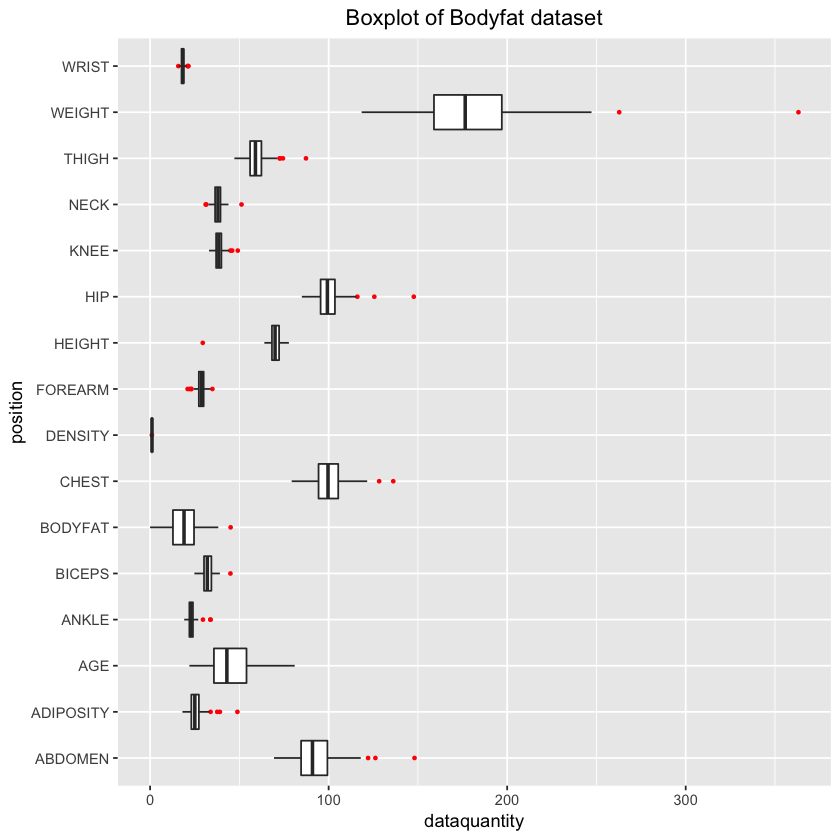

In [7]:
require(ggplot2)
dat <- data.frame(position = factor(rep(c("BODYFAT","DENSITY","AGE","WEIGHT","HEIGHT","ADIPOSITY","NECK","CHEST","ABDOMEN","HIP","THIGH","KNEE","ANKLE","BICEPS","FOREARM","WRIST"), each=252)), dataquantity = c(bodyfat$BODYFAT,bodyfat$DENSITY,bodyfat$AGE,bodyfat$WEIGHT,bodyfat$HEIGHT,bodyfat$ADIPOSITY,bodyfat$NECK,bodyfat$CHEST,bodyfat$ABDOMEN,bodyfat$HIP,bodyfat$THIGH,bodyfat$KNEE,bodyfat$ANKLE,bodyfat$BICEPS,bodyfat$FOREARM,bodyfat$WRIST))
ggplot(dat, aes(x = position, y = dataquantity)) +
  geom_boxplot(outlier.colour="red", outlier.shape=16,
               outlier.size=1, notch=FALSE)+
  guides(fill=FALSE) +
  coord_flip()+ggtitle("Boxplot of Bodyfat dataset")+theme(plot.title = element_text(hjust = 0.5))

# 2 Cleaning data# 

## 2.1 Use siri equation to find outlier

In [8]:
which.min(bodyfat$DENSITY) #"The body fat density of this person is below 1"
which.min(bodyfat$BODYFAT) #"The body fat is zero of this person"

[1] 216

[1] 182

In [9]:
as.matrix(bodyfat[c(216,182),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
216,216,45.1,0.9950,51,219.0,64,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
182,182,0.0,1.1089,40,118.5,68,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


Plot Bodyfat~1/density beacause from the formula
$$ \text{Percentage of Body Fat} = \dfrac{495}{\text{Body Density}} - 450 $$
there should be a linear relationship between the Bodyfat and the inverse of the density

#### Check the Residuals Plot

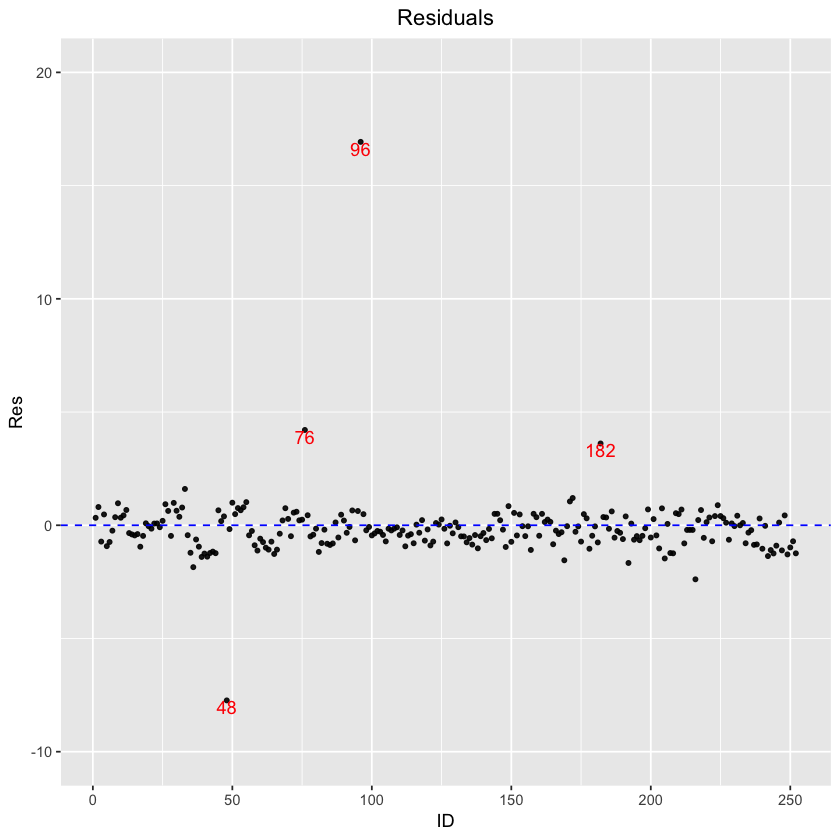

In [11]:
siri=495/bodyfat$DENSITY - 450
res=bodyfat$BODYFAT-siri
num=c(1:length(res))
index=which(abs(res)>1)
frame=data.frame(num,res)
library(ggplot2)
p1 = ggplot(frame, aes(x = num, y = res)) + geom_point( alpha=0.9,size=1)+
  geom_hline(aes(yintercept=0),col="blue",linetype="dashed")+
  annotate("text",x=frame$num,y=frame$res,label=ifelse(frame$res>3|frame$res< -3, frame$num,""),vjust=1,color="red")+ 
  labs(title="Residuals", x="ID", y="Res")+theme(plot.title = element_text(hjust = 0.5))+ylim(-10,20) 
p1

#### Check the Siri's Equation Plot

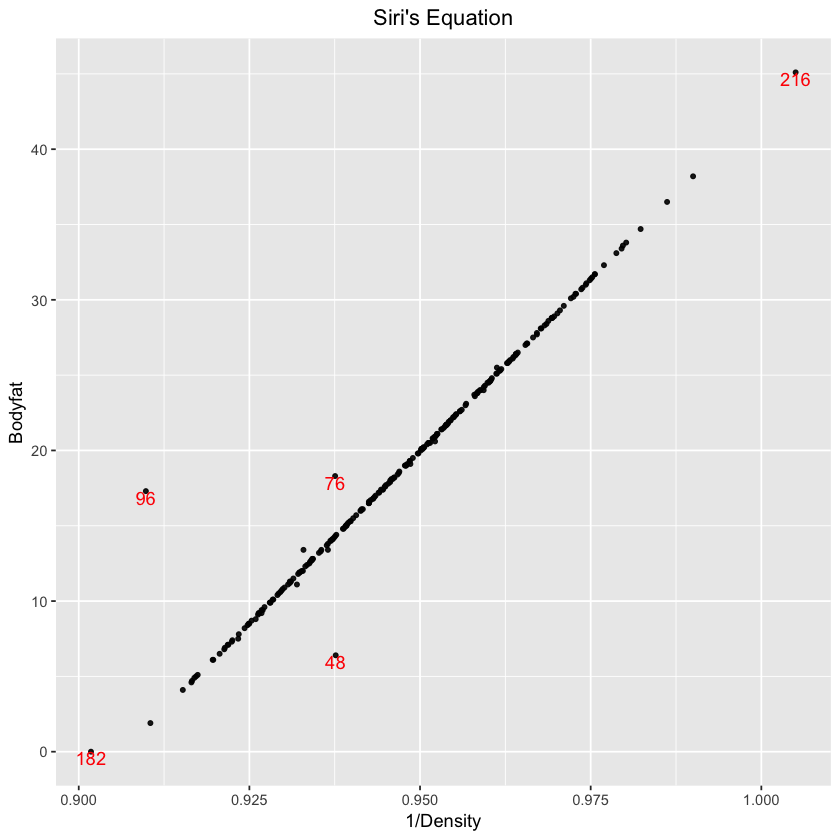

In [13]:
revdes=1/bodyfat$DENSITY 
frame1=data.frame(num=num,fat = bodyfat$BODYFAT,revdes,res)
p2 = ggplot(frame1, aes(x = revdes, y = fat)) + geom_point( alpha=0.9,size=1)+
  labs(title="Siri's Equation", x="1/Density", y="Bodyfat")+theme(plot.title = element_text(hjust = 0.5))+
  annotate("text",x = frame1$revdes, y = frame1$fat,label=ifelse(frame1$res>3|frame1$res< -3|frame1$revdes>1, frame1$num,""),vjust=1,color="red")
p2

From the plot above ,there are some points need to check

In [14]:
as.matrix(bodyfat[c(48 ,76, 96, 182, 216 ),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
48,48,6.4,1.0665,39,148.50,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9
76,76,18.3,1.0666,61,148.25,67.50,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3
96,96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
182,182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
216,216,45.1,0.9950,51,219.00,64.00,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


#### Check the outliers

####   48th entry

In [15]:
as.matrix(bodyfat[48,])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
48,48,6.4,1.0665,39,148.5,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9


for the 48 its bodyfat is 6.4, which is extreme lower than other person who has roughly same body indices, thus we can regard the bodyfat is acquired imprecise and use siri's equation to impute such value.

In [16]:
a=495/bodyfat$DENSITY[48]- 450
cat("the imputed bodyfat of 48 is", a)
bodyfat$BODYFAT[48]=a

the imputed bodyfat of 48 is 14.13502

#### 96th entry
At first we check the adjacent entries to find the abnormal component of 96th entry

In [17]:
as.matrix(bodyfat[c(96,97,98),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
96,96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
97,97,10.1,1.0770,38,188.75,73.25,24.8,37.5,99.1,91.6,102.4,60.6,39.4,22.9,31.6,30.1,18.5
98,98,11.1,1.0730,50,162.50,66.50,25.9,38.7,99.4,86.7,96.2,62.1,39.3,23.3,30.6,27.8,18.2


we can find from 97 and 98,when density increasing ,the bodyfat should decrease. However, this time when density goes up the bodyfat goes up as well. 

if we use the density to impute the bodyfat, then it should be

In [18]:
495/bodyfat$DENSITY[96]- 450

[1] 0.3684833

which is impossible compare with the bodyfat with others, hence this time we use bodyfat to compute density

In [19]:
bodyfat$DENSITY[96]=495/(bodyfat$BODYFAT[96]+450)
as.matrix(bodyfat[96,])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
96,96,17.3,1.059277,53,224.5,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4


#### 182th entry

In [20]:
 as.matrix(bodyfat[c(182,183,184),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
182,182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
183,183,11.9,1.0725,40,145.75,67.25,22.7,35.5,95.5,83.6,91.6,54.1,36.2,21.8,31.4,28.3,17.2
184,184,12.4,1.0713,40,159.25,69.75,23.0,35.3,92.3,86.8,96.1,58.0,39.4,22.7,30.0,26.4,17.4


the bodyfat is 0 so we should use density to compute

In [21]:
495/bodyfat$DENSITY[182]- 450

[1] -3.611687

After applying siri's equation,the bodyfat is negative ,which is impossible. We should delete 182 since neither the bodyfat nor density  are correct.

#### 76th entry

In [22]:
as.matrix(bodyfat[c(75,76),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
75,75,12.0,1.0720,61,143.00,65.75,23.3,36.5,93.4,83.3,93.0,55.5,35.2,20.9,29.4,27,16.8
76,76,18.3,1.0666,61,148.25,67.50,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27,18.3


Comparing these two entries,we can see that the bodyfat has a large gap among those two while the bmi does not show much difference, as well as the other variables. We could assume that the bodyfat of 76 is incorrect and impute it from density.

In [23]:
bodyfat$BODYFAT[76]=495/bodyfat$DENSITY[76]- 450

#### Recheck  Siri's Equation Plot

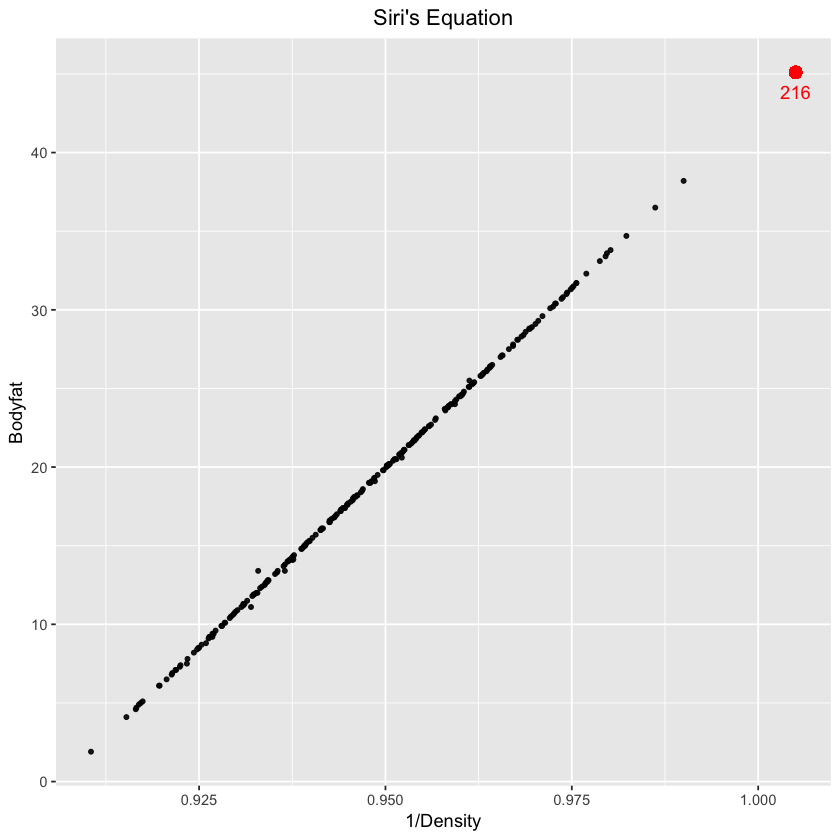

In [25]:
revdes=1/bodyfat$DENSITY 
frame1=data.frame(fat=bodyfat$BODYFAT[-c(182)],resd=revdes[-c(182)],n=num[-c(182)])
p2 = ggplot(frame1, aes(x = resd, y =fat)) + geom_point( alpha=0.9,size=1)+
  geom_point(data = frame1, aes(x = max(resd), y=max(fat)), colour = 'red', size = 3) +
  labs(title="Siri's Equation", x="1/Density", y="Bodyfat")+theme(plot.title = element_text(hjust = 0.5))+
  annotate("text",x =frame1$resd, y = frame1$fat,label=ifelse(frame1$resd>1, frame1$n,""),vjust=2,color="red")
p2

from above analysis,we know that 182 is the one we need to delete 

as for 216,it's 1/density and bodyfat is on the line,

hence the density is wrong and the bodyfat is computed by siri's equation

thus the 216 should also delete.

#### The final Siri's Equation Plot

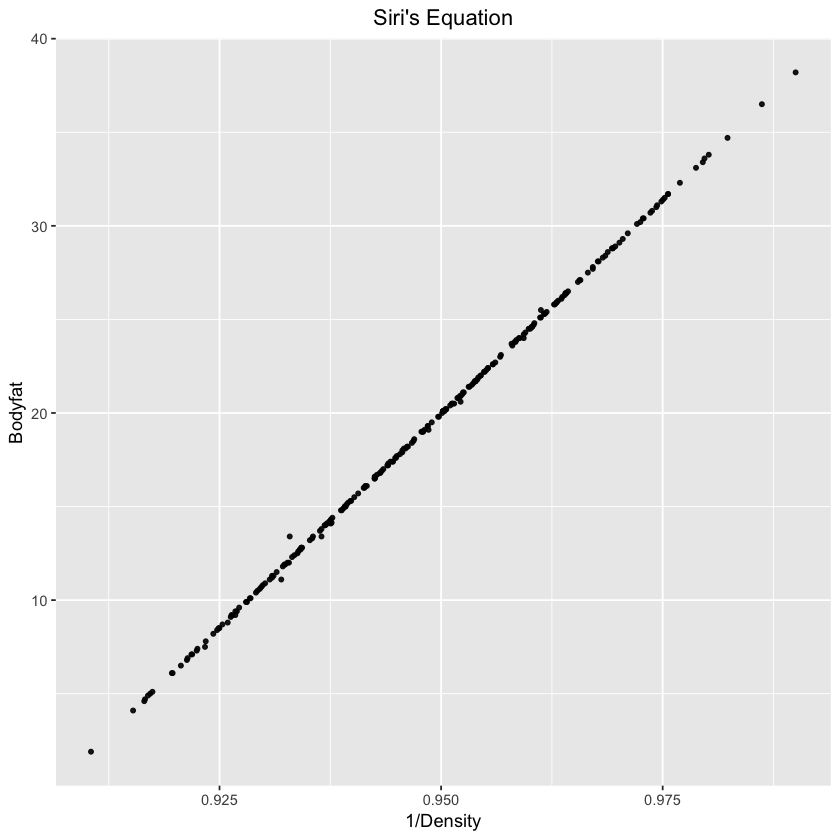

In [55]:
revdes=1/bodyfat$DENSITY 
frame1=data.frame(fat=bodyfat$BODYFAT[-c(182,216)],resd=revdes[-c(182,216)])
p3 = ggplot(frame1, aes(x = resd, y =fat)) + geom_point( alpha=0.9,size=1)+
  labs(title="Siri's Equation", x="1/Density", y="Bodyfat")+theme(plot.title = element_text(hjust = 0.5))
p3


## 2.2 Use BMI to find outliers 
$$bmi= {weight\over(height)^2}$$

#### Check the BMI Equation Plot 

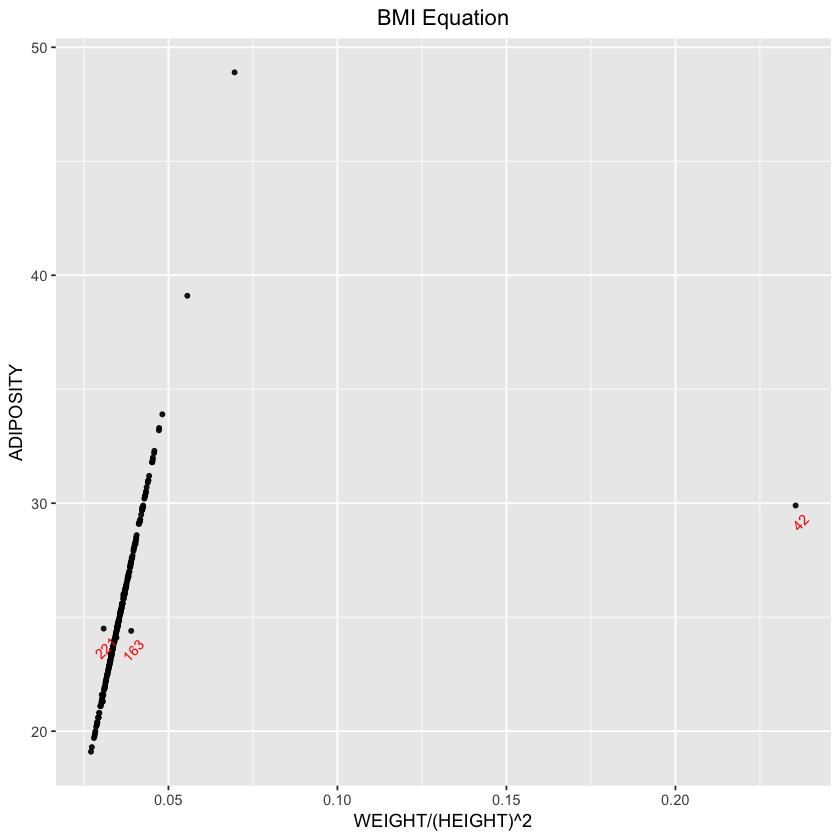

In [35]:
bmi=bodyfat$WEIGHT/(bodyfat$HEIGHT)^2
estimate=0.07035+702.07386*bmi
res=bodyfat$ADIPOSITY-estimate
num=c(1:252)
num1=num[-c(182,216)]
frame1=data.frame(adip=bodyfat$ADIPOSITY[c(-182,-216)],b=bmi[c(-182,-216)],r=res[c(-182,-216)],n=num1)
p3 = ggplot(frame1, aes(x = b, y =adip)) + geom_point( alpha=0.9,size=1)+
  labs(title="BMI Equation", x="WEIGHT/(HEIGHT)^2", y="ADIPOSITY")+theme(plot.title = element_text(hjust = 0.5))+
  annotate("text",x=frame1$b,y=frame1$adip,label=ifelse(frame1$r>2 | frame1$r < -2, frame1$n,""),vjust=2,hjust = 1,color="red",size=3,angle = 45)
p3

In [36]:
as.matrix(bodyfat[c(42,163,221),])

#construct a model so that we can use bmi to compute ADIPOSITY
summary(model.bmi<-lm(bodyfat$ADIPOSITY[-c(42,163,221)]~bmi[-c(42,163,221)]))

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
42,42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
163,163,13.3,1.0690,33,184.25,68.75,24.4,40.7,98.9,92.1,103.5,64.0,37.3,23.5,33.5,30.6,19.7
221,221,12.7,1.0706,54,153.25,70.50,24.5,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9



Call:
lm(formula = bodyfat$ADIPOSITY[-c(42, 163, 221)] ~ bmi[-c(42, 
    163, 221)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.278097 -0.022798 -0.001448  0.027690  0.266186 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)             0.07035    0.02131    3.302   0.0011 ** 
bmi[-c(42, 163, 221)] 702.07386    0.58397 1202.234   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04791 on 247 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 1.445e+06 on 1 and 247 DF,  p-value: < 2.2e-16


then we have a linear model which is 
$$ADIPOSITY=0.07035+702.07386*bmi$$

###  Check outliers

#### 42th entry

In [56]:
as.matrix(bodyfat[c(41,42,43),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
41,41,33.1,1.0217,45,262.75,68.75000,39.1,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
42,42,31.7,1.0250,44,205.00,69.46152,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
43,43,30.4,1.0279,48,217.00,70.00000,31.2,37.3,113.3,111.2,114.1,67.7,40.9,25.0,36.7,29.8,18.4


the heigth of the 42 is only 29.5 which might be mistake

In [57]:
cat("the plug-in bmi value of 42 is", sqrt(bodyfat$WEIGHT[42]/bodyfat$ADIPOSITY[42]))

the plug-in bmi value of 42 is 2.618432

Since the plug-in bmi is abnormal, we need to impute one factor based on the aproximated adiposity and above estimated equation.

In [58]:
bmi.42=(bodyfat$ADIPOSITY[42]-0.07035)/702.07386
print(height<-sqrt(bodyfat$WEIGHT[42]/bmi.42))

[1] 69.46152


hence the height of the 42 guy is 69.4615, which is much reliable

#### 221th entry 

In [59]:
as.matrix(bodyfat[c(116,123,218,221),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
116,116,16.7,1.0607,40,158.0000,69.25,23.4,36.3,97.0,86.6,92.6,55.9,36.3,22.1,29.8,26.3,17.3
123,123,14.8,1.0652,40,160.2500,68.75,23.9,36.9,99.3,83.3,97.5,60.5,38.7,22.6,34.4,28.0,17.6
218,218,8.2,1.0819,51,154.5000,70.00,22.2,36.9,93.3,81.5,94.4,54.7,39.0,22.6,27.5,25.9,18.6
221,221,12.7,1.0706,54,172.9469,70.50,24.5,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9


For 221 ,the weight and height are similar with the 218. however, their ADIPOSITY differ markedly with each other.
there must be at least one wrong value among these three variables. Since the rest variables of 221 are larger than 218 and on the contradiction , the weight is smaller. 

Hence we assume that the weight of 221 might be wrong

In [60]:
bmi.221=(bodyfat$ADIPOSITY[221]-0.07035)/702.07386
weight=bmi.221*(bodyfat$HEIGHT[221])^2
cat(bodyfat$WEIGHT[221]<-weight)

172.9469

#### 163th entry

In [61]:
as.matrix(bodyfat[c(158,163,167,170),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
158,158,10.5,1.0761,28,182.50,72.25,24.60000,37.0,98.5,90.8,102.5,60.8,38.5,25.0,31.6,28.0,18.6
163,163,13.3,1.0690,33,184.25,68.75,27.42749,40.7,98.9,92.1,103.5,64.0,37.3,23.5,33.5,30.6,19.7
167,167,21.4,1.0492,35,166.25,68.00,25.30000,38.5,99.1,90.4,95.6,55.5,34.2,21.9,30.2,28.7,17.7
170,170,16.5,1.0610,35,172.75,69.50,25.20000,37.6,99.1,90.8,98.1,60.1,39.1,23.4,32.5,29.8,17.4


comparing 163 and 167, the value of 163 are larger than 167 with the same height

it is reasonable to say 163 is fatter  than 167 based on the bodyfat and density comparing

but the ADIPOSITY of 163 is smaller

hence we guess there is a mistake when we compute the ADIPOSITY.

What's more weight 163>158,height:163<158,the ADIPOSITY should be 163>158,but the data is not

In [62]:
bmi.163=bodyfat$WEIGHT[163]/(bodyfat$HEIGHT[163])^2
adi=0.1942+698.6151*bmi.163
print(bodyfat$ADIPOSITY[163]<-adi)

[1] 27.42749


#### Recheck the Bmi Equation again

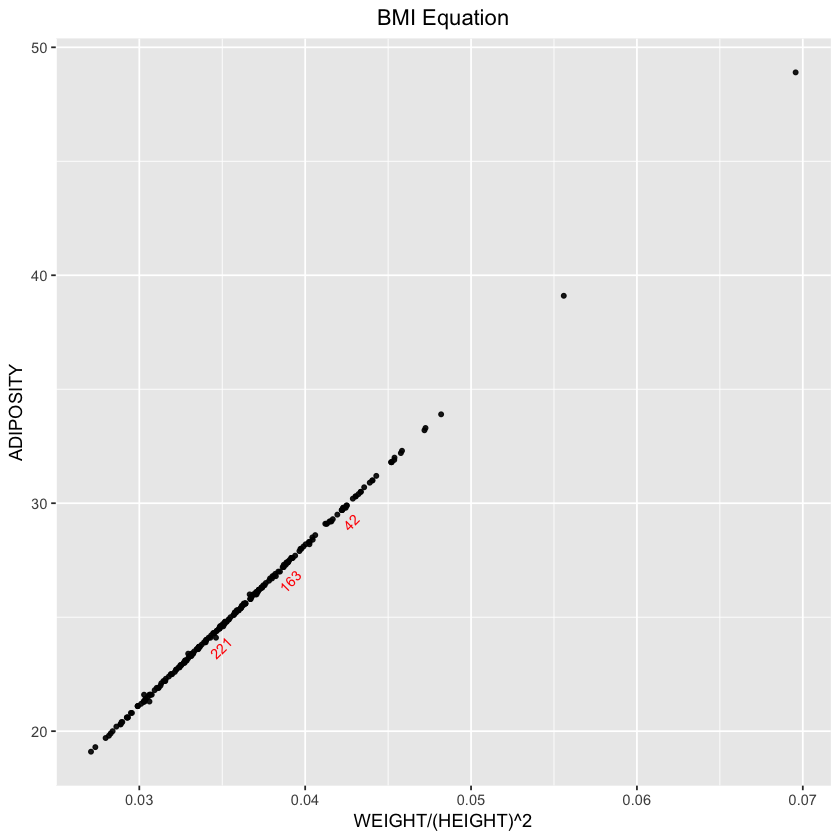

In [63]:
bmi=bodyfat$WEIGHT/(bodyfat$HEIGHT)^2
frame1=data.frame(adip=bodyfat$ADIPOSITY[c(-182,-216)],b=bmi[c(-182,-216)],r=res[c(-182,-216)],n=num1)
p3 = ggplot(frame1, aes(x = b, y =adip)) + geom_point( alpha=0.9,size=1)+
  labs(title="BMI Equation", x="WEIGHT/(HEIGHT)^2", y="ADIPOSITY")+theme(plot.title = element_text(hjust = 0.5))+
  annotate("text",x=frame1$b,y=frame1$adip,label=ifelse(frame1$r>2 | frame1$r < -2, frame1$n,""),vjust=2,hjust = 1,color="red",size=3,angle = 45)
p3

using these two criterion we only need to delet 182,216, other outliers will be replaced by the imputations.

## 2.3  Use the Cook's distance to detect outliers

Cook's distance or Cook's D is a commonly used estimate of
the influence of a data point when performing a least-squares regression
analysis
Rule of thumb: classify as leverages anything above 4/(n-p).

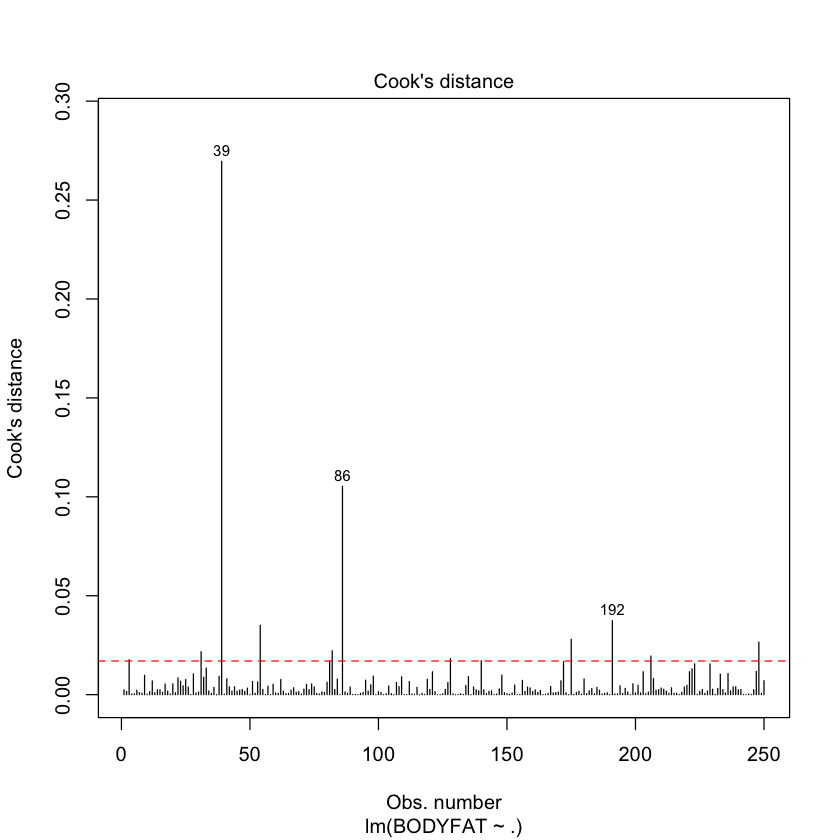

In [73]:
library(car,quietly=TRUE)
model=lm(BODYFAT~ ., data=bodyfat[-c(182,216 ),c(-1,-3)])
plot(model,which = 4)
n=nrow(bodyfat[-c(182,216 ),c(-1,-3)])
p=ncol(bodyfat[-c(182,216 ),c(-1,-3)])
abline(h = 4/(n-p),lty=2,col='red')

#### 39th entry

In [74]:
outlier=as.matrix(bodyfat[39,])
outlier#weight  363.15 pounds

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45,29,21.4


since we'd like to find a way to predict the bodyfat for most people

39 as a very influntial point may affect our result and the it's not common

hence we decide to delect 39 and fit model again


Call:
lm(formula = BODYFAT ~ ., data = bodyfat[-c(39, 182, 216), c(-1, 
    -3)])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7194 -2.6709 -0.1562  2.7681  9.0895 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -78.20238   54.33028  -1.439 0.151377    
AGE           0.06242    0.02943   2.121 0.034964 *  
WEIGHT       -0.24493    0.15230  -1.608 0.109128    
HEIGHT        0.93730    0.77486   1.210 0.227637    
ADIPOSITY     1.56723    1.10410   1.419 0.157093    
NECK         -0.35551    0.21559  -1.649 0.100491    
CHEST        -0.11722    0.10351  -1.132 0.258610    
ABDOMEN       0.83615    0.08595   9.728  < 2e-16 ***
HIP          -0.18338    0.13617  -1.347 0.179359    
THIGH         0.18074    0.13740   1.315 0.189662    
KNEE          0.04991    0.22866   0.218 0.827391    
ANKLE         0.12928    0.20416   0.633 0.527200    
BICEPS        0.18204    0.15617   1.166 0.244928    
FOREARM       0.24441    0.19226   1.271 0.204921   

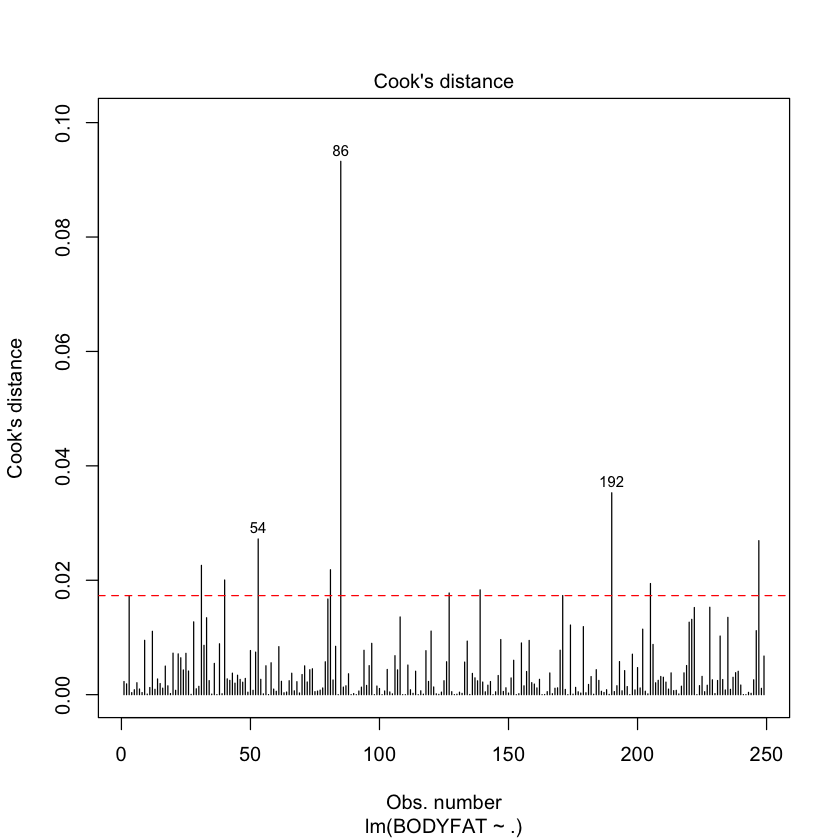

In [80]:
model_2=lm(BODYFAT~ ., data=bodyfat[-c(39,182,216 ),c(-1,-3)])
summary(model_2)
plot(model_2,which = 4)
n=n-1#delete 39
abline(h = 4/(n-p),lty=2,col='red')

#### 86th entry


Call:
lm(formula = BODYFAT ~ ., data = bodyfat[-c(39, 86, 182, 216), 
    c(-1, -3)])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3514 -2.7470 -0.1693  2.7177  9.0398 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -75.22680   54.19331  -1.388  0.16643    
AGE           0.05335    0.02990   1.785  0.07564 .  
WEIGHT       -0.23578    0.15193  -1.552  0.12205    
HEIGHT        0.90793    0.77266   1.175  0.24117    
ADIPOSITY     1.49694    1.10155   1.359  0.17548    
NECK         -0.35752    0.21492  -1.663  0.09756 .  
CHEST        -0.11015    0.10328  -1.066  0.28730    
ABDOMEN       0.83742    0.08569   9.773  < 2e-16 ***
HIP          -0.18963    0.13580  -1.396  0.16393    
THIGH         0.19470    0.13726   1.418  0.15739    
KNEE          0.09337    0.22961   0.407  0.68465    
ANKLE        -0.09429    0.24828  -0.380  0.70446    
BICEPS        0.15804    0.15643   1.010  0.31340    
FOREARM       0.25229    0.19173   1.316  0.1895

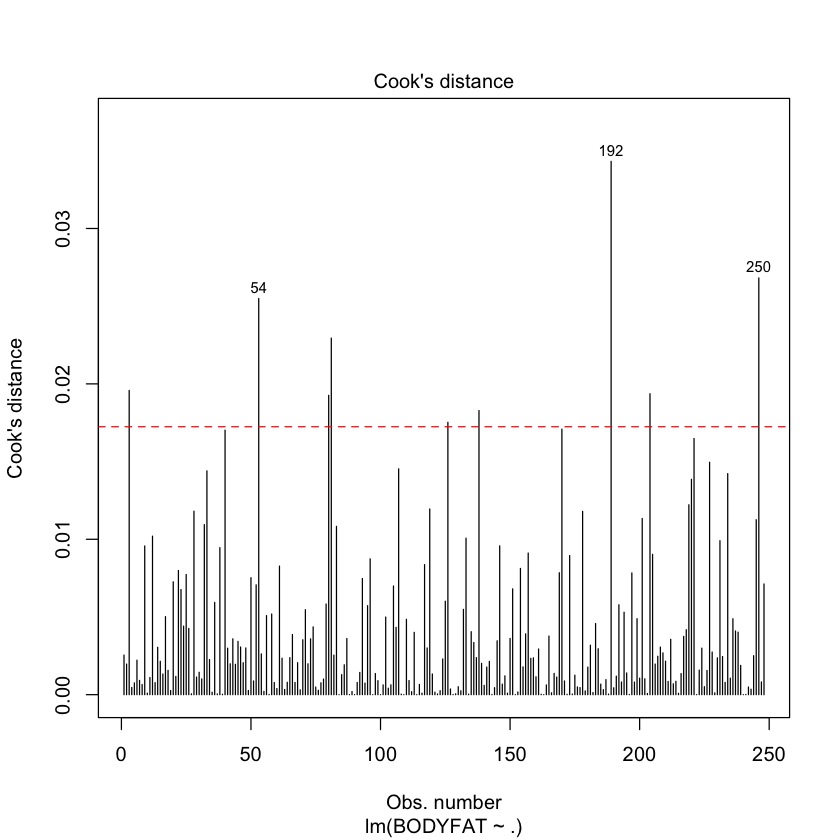

In [79]:
model_4=lm(BODYFAT~ ., data=bodyfat[-c(39,86,182,216 ),c(-1,-3)])
summary(model_4)
plot(model_4,which = 4)
n=n-1#delete 42
abline(h = 4/(n-p),lty=2,col='red')


## 2.4 Export cleanning data

In [54]:
bodyfat_new=bodyfat[-c(39,86,182,216),c(-1)]
write.csv(bodyfat_new,"clean dataset.csv")

## 2.5 Check the assumption

In [87]:
cleanbodyfat=read.csv("clean dataset.csv")
model=lm(BODYFAT~ ., data=cleanbodyfat[,c(-1,-3)])
#1.Residuals vs Fitted values Plot
p1=ggplot(model, aes(.fitted, .resid))+
    geom_point()+
    stat_smooth(method="loess")+
    geom_hline(yintercept=0, col="red", linetype="solid")+
     xlab("Fitted values")+ylab("Residuals")+
     ggtitle("Residuals vs Fitted values Plot")+
     theme_bw()+
    theme(plot.title = element_text(hjust = 0.5))

#2.qq Plot  
p2=ggplot(model, aes(qqnorm(.stdresid)[[1]], .stdresid))+
    geom_point(na.rm = TRUE)+
   geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    xlab("Theoretical Quantiles")+
    ylab("Standardized Residuals")+
    ggtitle("qq Plot")+
    theme_bw()+
    theme(plot.title = element_text(hjust = 0.5))

 #3.Scale vs Location Plot  
 p3=ggplot(model, aes(.fitted, sqrt(abs(.stdresid))))+
   geom_point(na.rm=TRUE)+
   stat_smooth(method="loess", na.rm = TRUE)+
   xlab("Fitted Value")+
   ylab(expression(sqrt("|Standardized residuals|")))+
   ggtitle("Scale vs Location Plot")+
   theme_bw()+
   theme(plot.title = element_text(hjust = 0.5))

#4. Cook's distance Plot
  p4=ggplot(model, aes(seq_along(.cooksd), .cooksd))+
    geom_bar(stat="identity", position="identity")+
    xlab("Obs. Number")+
    ylab("Cook's distance")+
    ggtitle("Cook's distance Plot")+
    theme_bw()+
    theme(plot.title = element_text(hjust = 0.5))

#5. Residual vs Leverage Plot
  p5=ggplot(model, aes(.hat, .stdresid))+
    geom_point(aes(size=.cooksd), na.rm=TRUE)+
    stat_smooth(method="loess", na.rm=TRUE)+
    xlab("Leverage")+ylab("Standardized Residuals")+
    ggtitle("Residual vs Leverage Plot")+
    scale_size_continuous("Cook's Distance", range=c(1,5))+
    theme_bw()+
    theme(legend.position="bottom")+
    theme(plot.title = element_text(hjust = 0.5))

#6. Cook's distance vs Leverage hii/(1-hii) Plot
  p6=ggplot(model, aes(.hat, .cooksd))+
    geom_point(na.rm=TRUE)+
    stat_smooth(method="loess", na.rm=TRUE)+
    xlab("Leverage hii")+ylab("Cook's Distance")+
    ggtitle("Cook's distance vs Leverage hii/(1-hii) Plot")+
    geom_abline(slope=seq(0,4,0.5), color="red", linetype="dashed")+
    theme_bw()+
    theme(plot.title = element_text(hjust = 0.5))
  
 #library(magrittr)
 #library(multipanelfigure)
 #figure1 <- multi_panel_figure(columns = 3, rows = 2, panel_label_type = "none") 
 #figure1 %<>%
 #  fill_panel(p1, column = 1, row = 1) %<>%
 #  fill_panel(p2, column = 2, row = 1) %<>%
 #  fill_panel(p3, column = 3, row = 1) %<>%
 #  fill_panel(p4, column = 1, row = 2) %<>%
 #  fill_panel(p5, column = 2, row = 2) %<>%
 #  fill_panel(p6, column = 3, row = 2)
 #figure1 

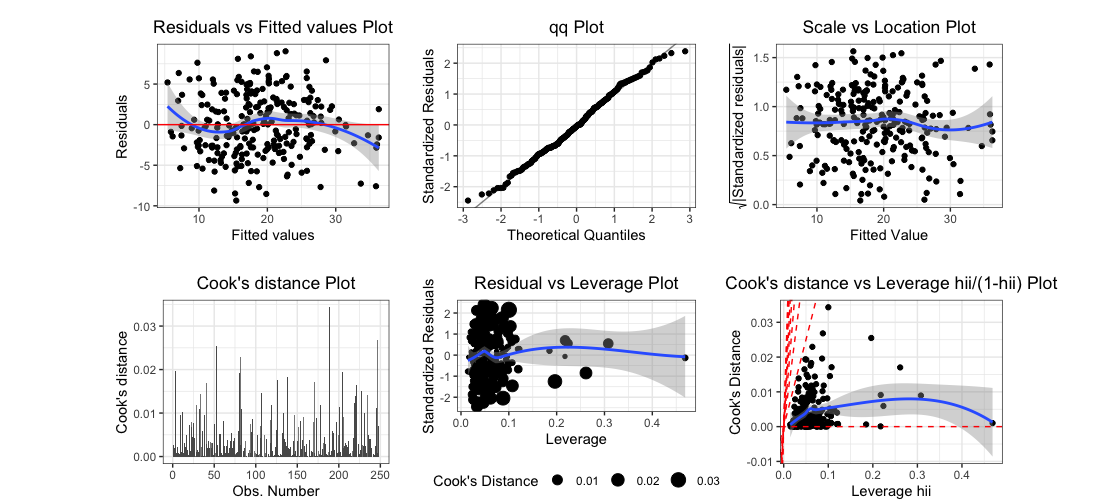

##### From the plot, we can assume that the cleanned data satisfy the assumption of normality, equal variance and independence.

# 3 Check multicollinear with VIF

In [97]:
bodyfat_new=read.csv("clean dataset.csv")
library(car)
bodyfat_new = bodyfat_new[,-1]
bodyfat_newcv=read.csv("clean dataset.csv")
head(bodyfat_new)
model.new=lm(BODYFAT ~ . , data=bodyfat_new[,-2])#delete density and a column represent the order
vif(model.new)

BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


AGE     WEIGHT     HEIGHT  ADIPOSITY       NECK      CHEST    ABDOMEN 
  2.327504 270.289518  65.342302 208.033429   3.911329  11.134651  11.998907 
       HIP      THIGH       KNEE      ANKLE     BICEPS    FOREARM      WRIST 
 12.446574   7.436785   4.610649   2.274305   3.407011   2.452296   3.369780

##### From the VIF above, It is obvious that there is a significant multicolinear and we need to do the variable selection.  

# 4 Model building
## 4.1 Use Aic and Bic in both direction
### 4.1.1 AIC

In [98]:
summary(model.aic.both<-step(model.new,direction = "both",k=2))

Start:  AIC=687.7
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      2.18 3519.5 685.85
- KNEE       1      2.50 3519.8 685.88
- BICEPS     1     15.41 3532.7 686.79
- CHEST      1     17.17 3534.5 686.91
- HEIGHT     1     20.84 3538.1 687.17
- FOREARM    1     26.14 3543.4 687.54
- ADIPOSITY  1     27.88 3545.2 687.66
<none>                   3517.3 687.70
- HIP        1     29.44 3546.7 687.77
- THIGH      1     30.37 3547.7 687.83
- WEIGHT     1     36.35 3553.7 688.25
- NECK       1     41.77 3559.1 688.63
- AGE        1     48.07 3565.4 689.07
- WRIST      1    135.06 3652.4 695.05
- ABDOMEN    1   1441.75 4959.1 770.89

Step:  AIC=685.85
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      1.64 3521.1 683.97
- 


Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + NECK + ABDOMEN + THIGH + 
    FOREARM + WRIST, data = bodyfat_new[, -2])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7548 -2.7357 -0.2139  2.5880  9.1947 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -29.34632    8.35033  -3.514 0.000527 ***
AGE           0.05600    0.02824   1.983 0.048508 *  
WEIGHT       -0.09934    0.03275  -3.033 0.002684 ** 
NECK         -0.28842    0.20186  -1.429 0.154355    
ABDOMEN       0.82771    0.06571  12.596  < 2e-16 ***
THIGH         0.22148    0.10601   2.089 0.037741 *  
FOREARM       0.36674    0.17812   2.059 0.040572 *  
WRIST        -1.41215    0.46685  -3.025 0.002758 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.868 on 240 degrees of freedom
Multiple R-squared:  0.737,	Adjusted R-squared:  0.7294 
F-statistic: 96.09 on 7 and 240 DF,  p-value: < 2.2e-16


### 4.1.2 BIC

In [99]:
n=nrow(bodyfat_new)
summary(model.bic.both<-step(model.new,direction = "both",k=log(n)))

Start:  AIC=740.4
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      2.18 3519.5 735.04
- KNEE       1      2.50 3519.8 735.07
- BICEPS     1     15.41 3532.7 735.97
- CHEST      1     17.17 3534.5 736.10
- HEIGHT     1     20.84 3538.1 736.35
- FOREARM    1     26.14 3543.4 736.73
- ADIPOSITY  1     27.88 3545.2 736.85
- HIP        1     29.44 3546.7 736.96
- THIGH      1     30.37 3547.7 737.02
- WEIGHT     1     36.35 3553.7 737.44
- NECK       1     41.77 3559.1 737.82
- AGE        1     48.07 3565.4 738.26
<none>                   3517.3 740.40
- WRIST      1    135.06 3652.4 744.23
- ABDOMEN    1   1441.75 4959.1 820.08

Step:  AIC=735.04
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      1.64 3521.1 729.64
- 


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + WRIST, data = bodyfat_new[, 
    -2])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0511 -2.9046 -0.3192  2.9739  9.2199 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.58136    6.15265  -3.833 0.000161 ***
WEIGHT       -0.08617    0.02234  -3.858 0.000146 ***
ABDOMEN       0.87932    0.05170  17.007  < 2e-16 ***
WRIST        -1.28342    0.39603  -3.241 0.001358 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 244 degrees of freedom
Multiple R-squared:  0.7251,	Adjusted R-squared:  0.7218 
F-statistic: 214.6 on 3 and 244 DF,  p-value: < 2.2e-16


### 4.1.3 Conclusion of Aic and Bic
1.Rule of thumb: Good models are those that are within 2 AIC units of the lowest AIC value. Models with more than 10 AIC units above the lowest AIC value are generally not considered.
2.AIC can result in overfitting.
3.AIC and most other criteria do not have measure of variation and thus the rules are generally approximations.
#### Hence choose the model lm(BODYFAT ~ WEIGHT + ABDOMEN + WRIST)

### 4.1.4 Check the MSE of BIC after Cross Validation 

#### the mse of BIC method

In [100]:
source("Crossvalidation.R")
summary(model.new <- lm(BODYFAT~ WEIGHT + ABDOMEN + WRIST,data=bodyfat_new)) # the R^2 is 0.7251
as.matrix(anova(model.new))
model.bic1=BODYFAT ~ WEIGHT + ABDOMEN + WRIST
cat(bic_cv1 = CVMSE(bodyfat_newcv, model.bic1, 5,100))


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + WRIST, data = bodyfat_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0511 -2.9046 -0.3192  2.9739  9.2199 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.58136    6.15265  -3.833 0.000161 ***
WEIGHT       -0.08617    0.02234  -3.858 0.000146 ***
ABDOMEN       0.87932    0.05170  17.007  < 2e-16 ***
WRIST        -1.28342    0.39603  -3.241 0.001358 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 244 degrees of freedom
Multiple R-squared:  0.7251,	Adjusted R-squared:  0.7218 
F-statistic: 214.6 on 3 and 244 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
WEIGHT,1,5080.072,5080.07194,330.2852,2.982743e-47
ABDOMEN,1,4659.781,4659.78150,302.9596,1.163295e-44
WRIST,1,161.536,161.53596,10.5024,1.358219e-03
Residuals,244,3752.931,15.38087,NA,NA


15.67993

#### Since we want to find the simple and accurate model,and we know that the WRIST doesn't make a difference too much. Just try to delete it.

In [101]:
summary(model.new1<-lm(BODYFAT~ WEIGHT + ABDOMEN,data=bodyfat_new))#the R^2 is 0.7133 compare with the full modle  the R^2 not change much
model.bic2=BODYFAT ~ WEIGHT + ABDOMEN


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN, data = bodyfat_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0398  -2.9255  -0.0718   2.9003   9.9225 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -41.90074    2.47576 -16.924  < 2e-16 ***
WEIGHT       -0.12302    0.01959  -6.279 1.54e-09 ***
ABDOMEN       0.89564    0.05244  17.078  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.997 on 245 degrees of freedom
Multiple R-squared:  0.7133,	Adjusted R-squared:  0.711 
F-statistic: 304.8 on 2 and 245 DF,  p-value: < 2.2e-16


#### MSE of model leaving WRIST out

In [102]:
cat(bic_cv2 = CVMSE(bodyfat_newcv, model.bic2, 5,100))

16.19831

##### Since the mse does not change too much,  we decide to keep this model BODYFAT ~ WEIGHT + ABDOMEN.

### 4.1.5 What if we only use one variable? 

#### Keep WEIGHT 

In [104]:
model.new2=lm(BODYFAT~ WEIGHT,data=bodyfat_new)
summary(model.new2)#the R^2 is 0.3721 decrease too much
model.bic3=BODYFAT ~ WEIGHT
bic_cv3 = CVMSE(bodyfat_newcv, model.bic3, 5,100)
bic_cv3


Call:
lm(formula = BODYFAT ~ WEIGHT, data = bodyfat_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.7117  -4.2050   0.0503   4.5468  17.0993 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.40623    2.53291  -4.503 1.03e-05 ***
WEIGHT        0.16953    0.01404  12.073  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.904 on 246 degrees of freedom
Multiple R-squared:  0.372,	Adjusted R-squared:  0.3695 
F-statistic: 145.8 on 1 and 246 DF,  p-value: < 2.2e-16


[1] 35.16224

#### Keep ABDOMEN

In [105]:
model.new3=lm(BODYFAT~  ABDOMEN ,data=bodyfat_new)
summary(model.new3)#the R^2 is 0.6672 
model.bic3=BODYFAT ~ ABDOMEN 
bic_cv4 = CVMSE(bodyfat_newcv, model.bic3, 5,100)
bic_cv4#18.62439


Call:
lm(formula = BODYFAT ~ ABDOMEN, data = bodyfat_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0806  -3.2794   0.1313   2.8879  11.9025 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -37.26486    2.54101  -14.66   <2e-16 ***
ABDOMEN       0.60769    0.02737   22.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.298 on 246 degrees of freedom
Multiple R-squared:  0.6672,	Adjusted R-squared:  0.6658 
F-statistic: 493.1 on 1 and 246 DF,  p-value: < 2.2e-16


[1] 18.63866

##### Only one variable seems too easy to get an error. We can't keep only one variable.

## 4.2 Mallow' cp

### 4.21 Read data into R

In [131]:
cleanbodyfat=read.csv("clean dataset.csv")
library(leaps,quietly=TRUE)
library(faraway,quietly=TRUE)
source("Crossvalidation.R")
n=ncol(cleanbodyfat)
X = cleanbodyfat[, 4:n]
Y = cleanbodyfat$BODYFAT

### 4.22 Check the variables chosen in each size 

Subset selection object
14 Variables  (and intercept)
          Forced in Forced out
AGE           FALSE      FALSE
WEIGHT        FALSE      FALSE
HEIGHT        FALSE      FALSE
ADIPOSITY     FALSE      FALSE
NECK          FALSE      FALSE
CHEST         FALSE      FALSE
ABDOMEN       FALSE      FALSE
HIP           FALSE      FALSE
THIGH         FALSE      FALSE
KNEE          FALSE      FALSE
ANKLE         FALSE      FALSE
BICEPS        FALSE      FALSE
FOREARM       FALSE      FALSE
WRIST         FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP THIGH KNEE ANKLE
1  ( 1 ) " " " "    " "    " "       " "  " "   "*"     " " " "   " "  " "  
2  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
3  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
4  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
5  ( 1 ) "*" "*"    " "    " "   

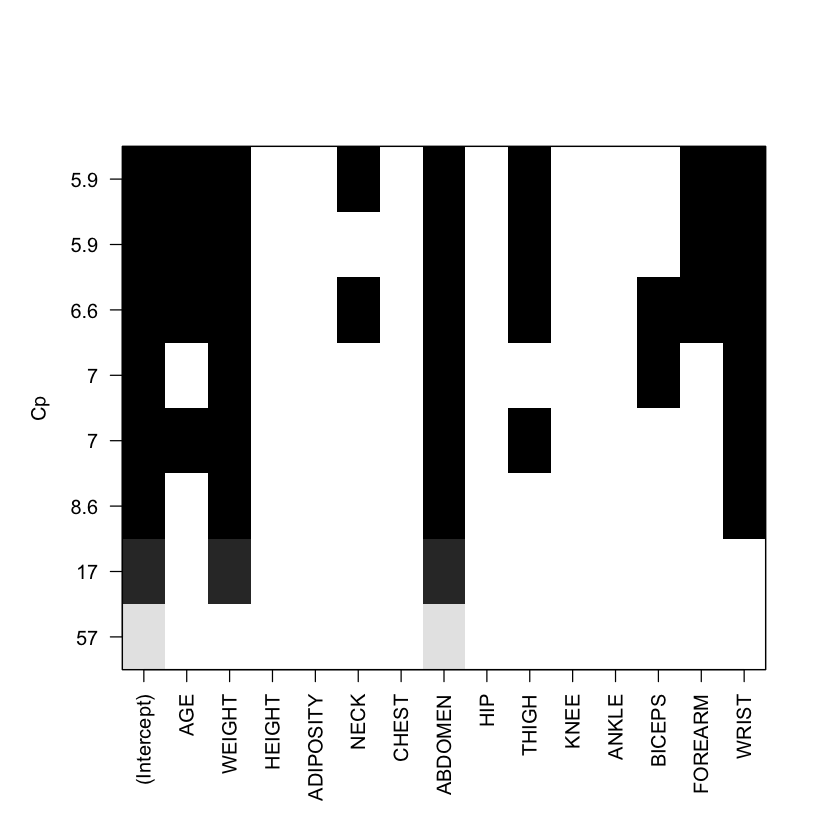

In [109]:
a=regsubsets(X,Y)
summary(a)
plot(a,scale="Cp")

  It's easy to find that ABDOMEN is significantly important in calculating bodyfat, followed by WEIGHT, and WRIST is the third factor. The other factors seems not that consistant in deciding bodyfat. We find that there is a limited decrease in mallow'cp when we increase the number of variables after the model BODYFAT ~ WEIGHT + ABDOMEN + WRIST. 

### 4.23 Get the best number of variables under the criterion of Mallow's cp 

[1] 7

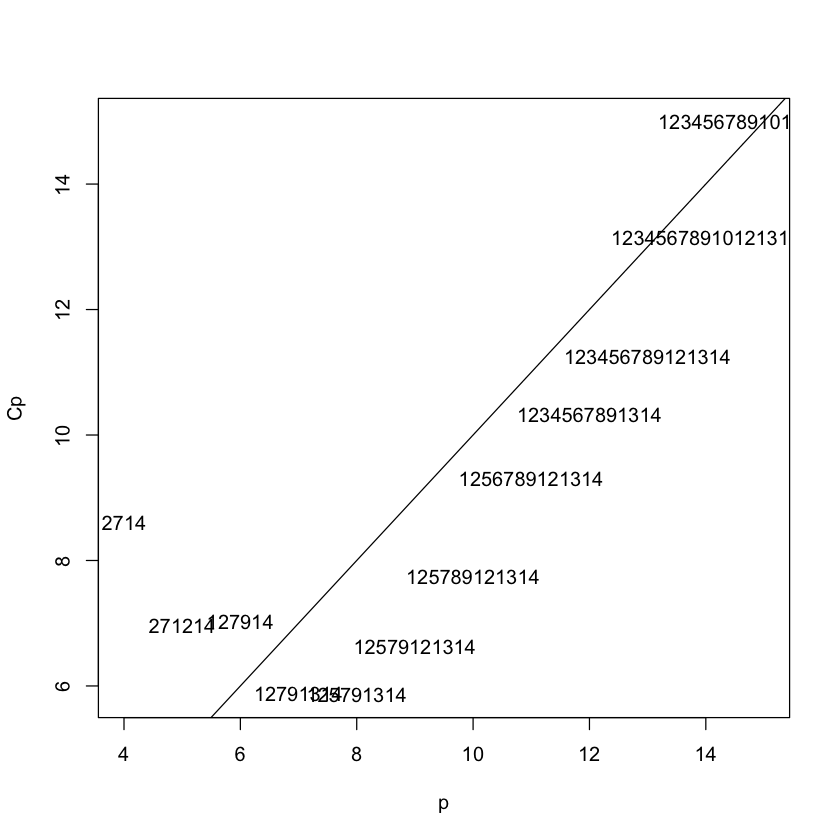

In [110]:
g1=leaps(X, Y, nbest = 1,method = "Cp")
Cpplot(g1)
order(g1$Cp)[1] 

### 4.24 Calculate the MSE of each models under Cross Validation

In [111]:
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[8,]==TRUE)) + 3])
model_cp0 = BODYFAT ~ AGE + WEIGHT + NECK + ABDOMEN  + THIGH + BICEPS + FOREARM + WRIST
cp0_cv = CVMSE(cleanbodyfat, model_cp0, 5,100)   # number of variables is 8
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[7,]==TRUE)) + 3])
model_cp1 = BODYFAT  ~ AGE + WEIGHT + NECK + ABDOMEN  + THIGH + FOREARM + WRIST
cp1_cv = CVMSE(cleanbodyfat, model_cp1, 5,100)   # number of variables is 7
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[6,]==TRUE)) + 3])  
model_cp2 = BODYFAT  ~ AGE + WEIGHT + ABDOMEN + THIGH + FOREARM + WRIST
cp2_cv = CVMSE(cleanbodyfat, model_cp2, 5,100)   # number of variables is 6
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[5,]==TRUE)) + 3])  
model_cp3 = BODYFAT  ~  WEIGHT + NECK + ABDOMEN + THIGH + WRIST
cp3_cv = CVMSE(cleanbodyfat, model_cp3, 5,100)   # number of variables is 5
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[4,]==TRUE)) + 3])  
model_cp4 = BODYFAT  ~  WEIGHT + ABDOMEN + BICEPS + WRIST
cp4_cv = CVMSE(cleanbodyfat, model_cp4, 5,100)   # number of variables is 4
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[3,]==TRUE)) + 3])  
model_cp5 = BODYFAT  ~  WEIGHT + ABDOMEN + WRIST
cp5_cv = CVMSE(cleanbodyfat, model_cp5, 5,100)   # number of variables is 3
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[2,]==TRUE)) + 3])  
model_cp6 = BODYFAT  ~  WEIGHT + ABDOMEN 
cp6_cv = CVMSE(cleanbodyfat, model_cp6, 5,100)   # number of variables is 2
print(colnames(cleanbodyfat)[as.numeric(which(g1$which[1,]==TRUE)) + 3])  
model_cp7 = BODYFAT  ~ ABDOMEN 
cp7_cv = CVMSE(cleanbodyfat, model_cp7, 5,100)   # number of variables is 1
cp_cv=c(cp0_cv,cp1_cv,cp2_cv,cp3_cv,cp4_cv,cp5_cv,cp6_cv,cp7_cv)

[1] "AGE"     "WEIGHT"  "NECK"    "ABDOMEN" "THIGH"   "BICEPS"  "FOREARM"
[8] "WRIST"  
[1] "AGE"     "WEIGHT"  "NECK"    "ABDOMEN" "THIGH"   "FOREARM" "WRIST"  
[1] "AGE"     "WEIGHT"  "ABDOMEN" "THIGH"   "FOREARM" "WRIST"  
[1] "AGE"     "WEIGHT"  "ABDOMEN" "THIGH"   "WRIST"  
[1] "WEIGHT"  "ABDOMEN" "BICEPS"  "WRIST"  
[1] "WEIGHT"  "ABDOMEN" "WRIST"  
[1] "WEIGHT"  "ABDOMEN"
[1] "ABDOMEN"


### 4.25 Plot the MSE and Mallow's cp under differernt number of variables

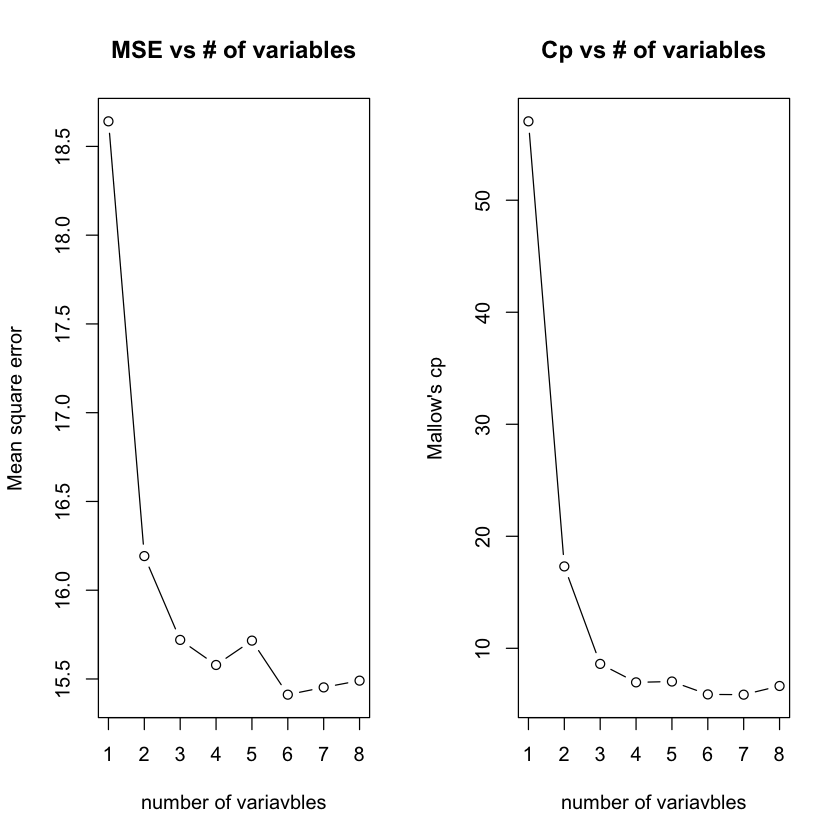

In [112]:
par(mfrow=c(1,2))
plot(x=8:1,cp_cv,xlab = "number of variavbles",ylab="Mean square error",type = "b",main = "MSE vs # of variables")
plot(x=1:8,y=g1$Cp[1:8],xlab = "number of variavbles",ylab="Mallow's cp",type = "b",main = "Cp vs # of variables")

### 4.26 Summary under the criterion of Mallow's cp

After plotting the mean square errors after cross validation and Mallow's cp whose number of variables vary from 1 to 8, we think 3 is the relatively good number of variables to estimate bodyfat. The model after the criterion of mallow's cp is BODYFAT  ~  WEIGHT + ABDOMEN + WRIST.

### 4.27 Conclusion

In [113]:
lm(BODYFAT  ~  WEIGHT + ABDOMEN + WRIST,data = cleanbodyfat)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + WRIST, data = cleanbodyfat)

Coefficients:
(Intercept)       WEIGHT      ABDOMEN        WRIST  
  -23.58136     -0.08617      0.87932     -1.28342  


#### BODYFAT  =  -0.08617*WEIGHT + 0.87932*ABDOMEN -1.28342*WRIST -23.58136

## 4.3 Adjusted R Square

### 4.31 Read data into R

In [114]:
cleanbodyfat=read.csv("clean dataset.csv")
library(leaps)
library(faraway)
source("Crossvalidation.R")
n=ncol(cleanbodyfat)
X = cleanbodyfat[, 4:n]
Y = cleanbodyfat$BODYFAT

### 4.32 Check the variables chosen in each size 

Subset selection object
14 Variables  (and intercept)
          Forced in Forced out
AGE           FALSE      FALSE
WEIGHT        FALSE      FALSE
HEIGHT        FALSE      FALSE
ADIPOSITY     FALSE      FALSE
NECK          FALSE      FALSE
CHEST         FALSE      FALSE
ABDOMEN       FALSE      FALSE
HIP           FALSE      FALSE
THIGH         FALSE      FALSE
KNEE          FALSE      FALSE
ANKLE         FALSE      FALSE
BICEPS        FALSE      FALSE
FOREARM       FALSE      FALSE
WRIST         FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP THIGH KNEE ANKLE
1  ( 1 ) " " " "    " "    " "       " "  " "   "*"     " " " "   " "  " "  
2  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
3  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
4  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
5  ( 1 ) "*" "*"    " "    " "   

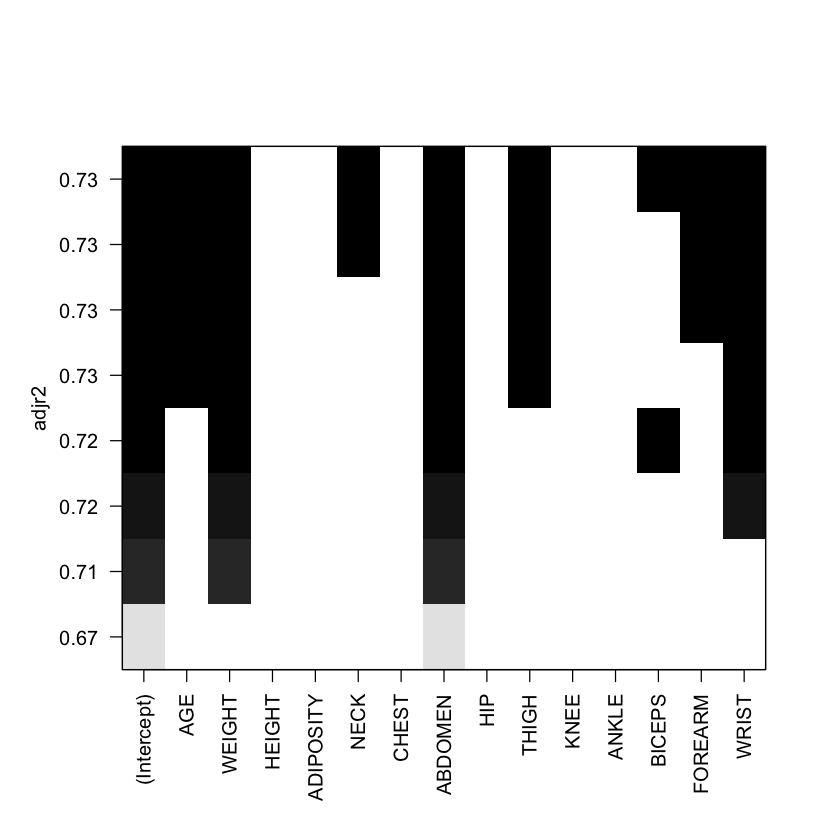

In [115]:
a<-regsubsets(X,Y)
summary(a)
plot(a,scale="adjr2")

It is similar to mallow's cp that ABDOMEN, WEIGHT, WRIST are top 3 important factors in calculating bodyfat. However, the adjusted r square increases in very slow rate when we increase the number of variables after the model BODYFAT ~ WEIGHT + ABDOMEN. 

### 4.33 Get the best number of variables under the criterion of Adjusted R Square

In [116]:
g2=leaps(X, Y, nbest = 1,method = "adjr2")
order(g2$adjr2,decreasing = TRUE)[1] #8

[1] 8

### 4.34 Calculate the MSE of each models under Cross Validation

In [117]:
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[9,]==TRUE)) + 3])
model_adjr20 = BODYFAT ~ AGE + WEIGHT + NECK + ABDOMEN +  HIP + THIGH + BICEPS + FOREARM + WRIST
adjr20_cv = CVMSE(cleanbodyfat, model_adjr20, 5,100)   # number of variables is 9
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[8,]==TRUE)) + 3])
model_adjr21 = BODYFAT ~ AGE + WEIGHT + NECK + ABDOMEN + THIGH + BICEPS + FOREARM + WRIST
adjr21_cv = CVMSE(cleanbodyfat, model_adjr21, 5,100)   # number of variables is 8
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[7,]==TRUE)) + 3])
model_adjr22 = BODYFAT ~ AGE + WEIGHT + NECK + ABDOMEN + THIGH  + FOREARM + WRIST
adjr22_cv = CVMSE(cleanbodyfat, model_adjr22, 5,100)   # number of variables is 7
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[6,]==TRUE)) + 3])
model_adjr23 = BODYFAT ~ AGE + WEIGHT + ABDOMEN + THIGH  + FOREARM + WRIST
adjr23_cv = CVMSE(cleanbodyfat, model_adjr23, 5,100)   # number of variables is 6
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[5,]==TRUE)) + 3])
model_adjr24 = BODYFAT ~ AGE + WEIGHT + ABDOMEN + THIGH + WRIST
adjr24_cv = CVMSE(cleanbodyfat, model_adjr24, 5,100)   # number of variables is 5
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[4,]==TRUE)) + 3])
model_adjr25 = BODYFAT ~ WEIGHT + ABDOMEN + BICEPS + WRIST
adjr25_cv = CVMSE(cleanbodyfat, model_adjr25, 5,100)   # number of variables is 4
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[3,]==TRUE)) + 3])
model_adjr26 = BODYFAT ~ WEIGHT + ABDOMEN +  WRIST
adjr26_cv = CVMSE(cleanbodyfat, model_adjr26, 5,100)   # number of variables is 3
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[2,]==TRUE)) + 3])
model_adjr27 = BODYFAT ~ WEIGHT + ABDOMEN
adjr27_cv = CVMSE(cleanbodyfat, model_adjr27, 5,100)   # number of variables is 2
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[1,]==TRUE)) + 3])
model_adjr28 = BODYFAT ~ ABDOMEN 
adjr28_cv = CVMSE(cleanbodyfat, model_adjr28, 5,100)   # number of variables is 1
adjr2_cv=c(adjr20_cv,adjr21_cv,adjr22_cv,adjr23_cv,adjr24_cv,adjr25_cv,adjr26_cv,adjr27_cv,adjr28_cv)

[1] "AGE"     "WEIGHT"  "NECK"    "ABDOMEN" "HIP"     "THIGH"   "BICEPS" 
[8] "FOREARM" "WRIST"  
[1] "AGE"     "WEIGHT"  "NECK"    "ABDOMEN" "THIGH"   "BICEPS"  "FOREARM"
[8] "WRIST"  
[1] "AGE"     "WEIGHT"  "NECK"    "ABDOMEN" "THIGH"   "FOREARM" "WRIST"  
[1] "AGE"     "WEIGHT"  "ABDOMEN" "THIGH"   "FOREARM" "WRIST"  
[1] "AGE"     "WEIGHT"  "ABDOMEN" "THIGH"   "WRIST"  
[1] "WEIGHT"  "ABDOMEN" "BICEPS"  "WRIST"  
[1] "WEIGHT"  "ABDOMEN" "WRIST"  
[1] "WEIGHT"  "ABDOMEN"
[1] "ABDOMEN"


### 4.35 Plot the MSE and Adjusted R Square under differernt number of variables

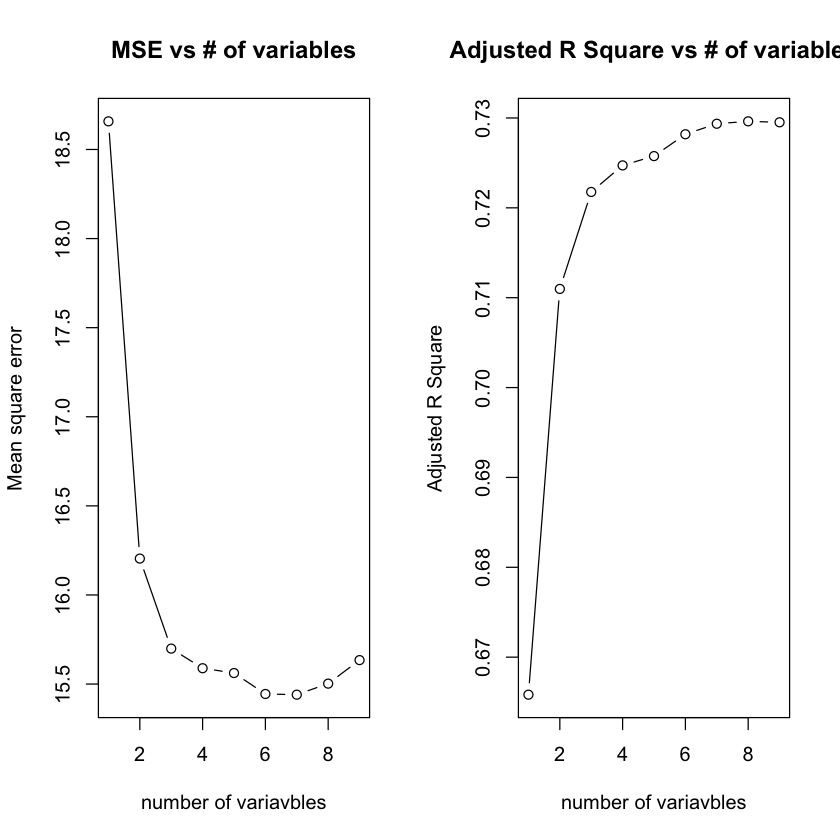

In [118]:
par(mfrow=c(1,2))
plot(x=9:1,adjr2_cv,xlab = "number of variavbles",ylab="Mean square error",type = "b",main = "MSE vs # of variables")
plot(x=1:9,g2$adjr2[1:9],xlab = "number of variavbles",ylab="Adjusted R Square",type = "b",main = "Adjusted R Square vs # of variables")

### 4.36 Summary under the criterion of Mallow's cp

After plotting the mean square errors after cross validation and the adjusted r square whose number of variables vary from 1 to 9, we think 2 has met the requirement of enough accuracy of the model. The model after the criterion of Adjusted R Square is BODYFAT  ~  WEIGHT + ABDOMEN.

### 4.37 Conclusion

In [119]:
lm(BODYFAT  ~  WEIGHT + ABDOMEN,data = cleanbodyfat)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN, data = cleanbodyfat)

Coefficients:
(Intercept)       WEIGHT      ABDOMEN  
   -41.9007      -0.1230       0.8956  


#### BODYFAT  =  -0.1230*WEIGHT + 0.8956*ABDOMEN -41.9007

## 4.4 BeSS

### 4.41 Read data into R

In [121]:
library("BeSS",quietly=TRUE)
total=read.csv("clean dataset.csv")
total = total[,-c(1,3)]

In [123]:
aic_bess = c()
bic_bess = c()
gic_bess = c()
mse_bess = c()
aic_bess[1] = Inf
bic_bess[1] = Inf
gic_bess[1] = Inf
mse_bess[1] = Inf
for ( i in 2:(length(total[1,])-1)){
  model_bic <- bess.one(x = total[,-1],y = total[,1],s = i)
  mse_bess[i] = model_bic$mse
  aic_bess[i] = model_bic$AIC
  bic_bess[i] = model_bic$BIC
  gic_bess[i] = model_bic$GIC
}

### 4.42 Plot the best MSE, AIC, BIC, GIC under each number of variables 

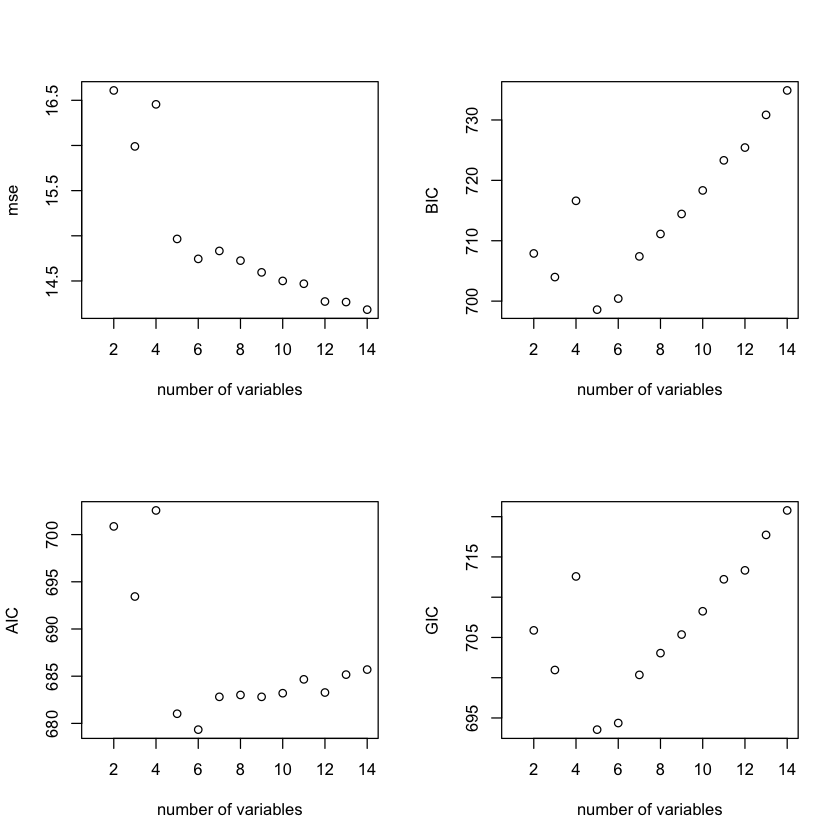

In [124]:
layout(matrix(1:4,ncol = 2))
plot(x = 2:length(total[1,])-1, y = mse_bess,xlab = "number of variables",ylab = "mse")
plot(x = 2:length(total[1,])-1, y =aic_bess,xlab = "number of variables",ylab = "AIC")
plot(x = 2:length(total[1,])-1, y =bic_bess,xlab = "number of variables",ylab = "BIC")
plot(x = 2:length(total[1,])-1, y =gic_bess,xlab = "number of variables",ylab = "GIC")

Based on the BIC creterion, the best choice of variables are the weight, adiposity, chest, abdomen and wrist.
Since from our experience, the wrist will not change too much from a slim person to the fat one, we try to leave it out and see how does bic change.

### 4.43 Check the optimal choice 

In [125]:
summary(model_bess_5 <- bess.one(y = total[,1], x = total[,-1],s = 5))

----------------------------------------------------------------------
    Primal-dual active algorithm with maximum iteration being 20 

    Best model with k = 5 includes predictors: 

     WEIGHT   ADIPOSITY       CHEST     ABDOMEN       WRIST 
-0.08553549  0.32860993 -0.10629224  0.85750192 -1.27843665 

    log-likelihood:   -335.5116 
    deviance:          671.0233 
    AIC:               681.0233 
    BIC:               698.5904 
    GIC:               693.5501 
----------------------------------------------------------------------


#### Leave WRIST out

In [126]:
summary(model_bess_4 <- bess.one(y = total[,1], x = total[,-1],s = 4))

----------------------------------------------------------------------
    Primal-dual active algorithm with maximum iteration being 20 

    Best model with k = 4 includes predictors: 

 ADIPOSITY      CHEST    ABDOMEN        HIP 
 0.4093457 -0.3021311  0.8802117 -0.3180236 

    log-likelihood:   -347.2795 
    deviance:          694.559 
    AIC:               702.559 
    BIC:               716.6127 
    GIC:               712.5805 
----------------------------------------------------------------------


#### Try 3 variables

In [127]:
summary(model_bess_3 <- bess.one(y = total[,1], x = total[,-1],s = 3))

----------------------------------------------------------------------
    Primal-dual active algorithm with maximum iteration being 20 

    Best model with k = 3 includes predictors: 

    HEIGHT      CHEST    ABDOMEN 
-0.4797692 -0.2350179  0.8042798 

    log-likelihood:   -343.7206 
    deviance:          687.4412 
    AIC:               693.4412 
    BIC:               703.9815 
    GIC:               700.9573 
----------------------------------------------------------------------


Adjust R square only changes from 0.7226 to 0.7118, and it is too small to keep WRIST as one independent variable.

### 4.44 Calculate the MSE and R Square after Cross Validation

In [134]:
times = 1000
mse_bess_5 <- rep(0,times)
mse_bess_4 <- rep(0,times)
mse_bess_3 <- rep(0,times)
total_bess_5 <- rep(0,times)
total_bess_4 <- rep(0,times)
total_bess_3 <- rep(0,times)
for (g in 1:times){
  choices = sample(1: length(total[,1]),82*2)
  test <- total[as.vector(choices),]
  val <- total[-as.vector(choices),]
  
  model_bess_3 <- bess.one(y = test[,1], x = test[,c(4,7,8)],s = 3)
  pre_bess_3 <-predict(model_bess_3,val,type = "BIC")
  
  model_bess_5 <- bess.one(y = test[,1], x = test[,c(3,5,7,8,15)],s = 5)
  pre_bess_5 <-predict(model_bess_5,val,type = "BIC")
  
  model_bess_4 <- bess.one(y = test[,1], x = test[,c(3,5,7,8)],s = 4)
  pre_bess_4 <-predict(model_bess_4,val,type = "BIC")
    
  ave <- ave(val[,1])
  for( i in 1:length(val[,1])){
    mse_bess_5[g] = as.numeric((pre_bess_5[i] - val[i,1])^2) + mse_bess_5[g]
    mse_bess_4[g] = as.numeric((pre_bess_4[i] - val[i,1])^2) + mse_bess_4[g]
    mse_bess_3[g] = as.numeric((pre_bess_3[i] - val[i,1])^2) + mse_bess_3[g]
    total_bess_5[g] = as.numeric((val[i,1] - ave[i])^2) + total_bess_5[g]
    total_bess_4[g] = as.numeric((val[i,1] - ave[i])^2) + total_bess_4[g]
    total_bess_3[g] = as.numeric((val[i,1] - ave[i])^2) + total_bess_3[g]
  }
}
R2_5 = 1 - mse_bess_5/total_bess_5
R2_4 = 1 - mse_bess_4/total_bess_4
R2_3 = 1 - mse_bess_3/total_bess_3
cat("the R square of 5 variables model is ",mean(R2_5),"\n")
cat("the R square of 4 variables model is ",mean(R2_4),"\n")
cat("the R square of 3 variables model is ",mean(R2_3),"\n")
cat("the MSE of 5 variables model is",mean(mse_bess_5/(length(total[,1])-82*2)),"\n")
cat("the MSE of 4 variables model is",mean(mse_bess_4/(length(total[,1])-82*2)),"\n")
cat("the MSE of 3 variables model is",mean(mse_bess_3/(length(total[,1])-82*2)),"\n")

the R square of 5 variables model is  0.7061192 
the R square of 4 variables model is  0.6966366 
the R square of 3 variables model is  0.6922298 
the MSE of 5 variables model is 15.8909 
the MSE of 4 variables model is 16.40065 
the MSE of 3 variables model is 16.64061 


## 4.5 Lasso

### 4.51 Calculate and plot Coefficients versus log(lambda)

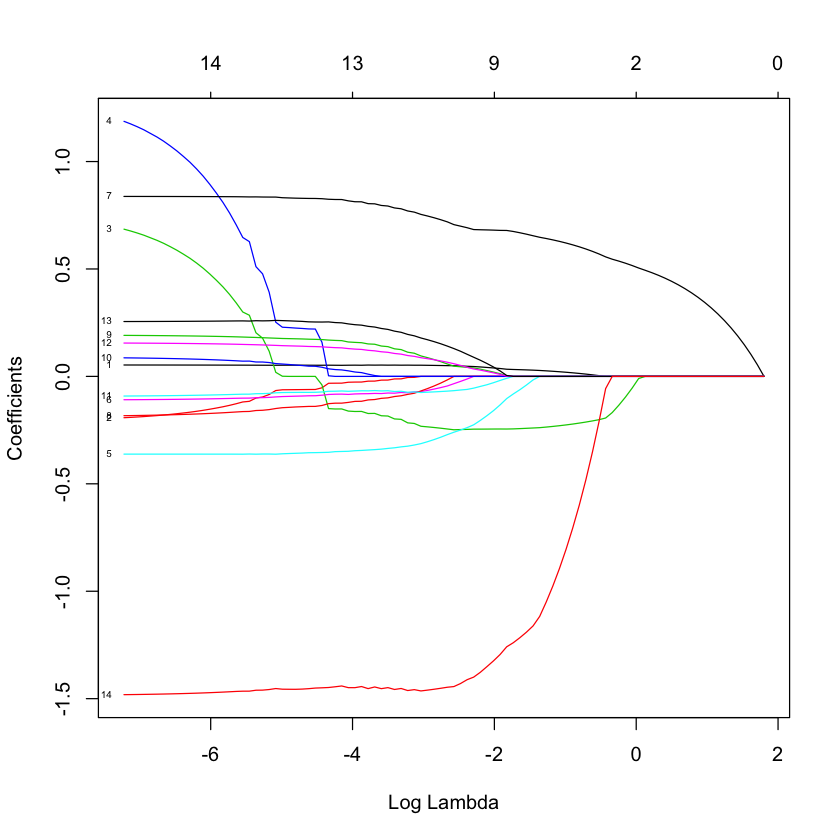

In [138]:
library(glmnet,quietly=TRUE)
### Data Path
data = read.csv("clean dataset.csv")
### Lasso
lasso_m = glmnet(as.matrix(data[,c(-1,-2,-3)]),data[,2],alpha = 1)
plot(lasso_m, label = T, xvar="lambda")

### 4.52 Calculate and plot MSE versus log(lambda)

15 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) -8.77990833
AGE          0.01928169
WEIGHT       .         
HEIGHT      -0.22587497
ADIPOSITY    .         
NECK         .         
CHEST        .         
ABDOMEN      0.62075648
HIP          .         
THIGH        .         
KNEE         .         
ANKLE        .         
BICEPS       .         
FOREARM      .         
WRIST       -0.80474480

[1] 0.3718853

[1] 0.7109882

[1] 16.68589

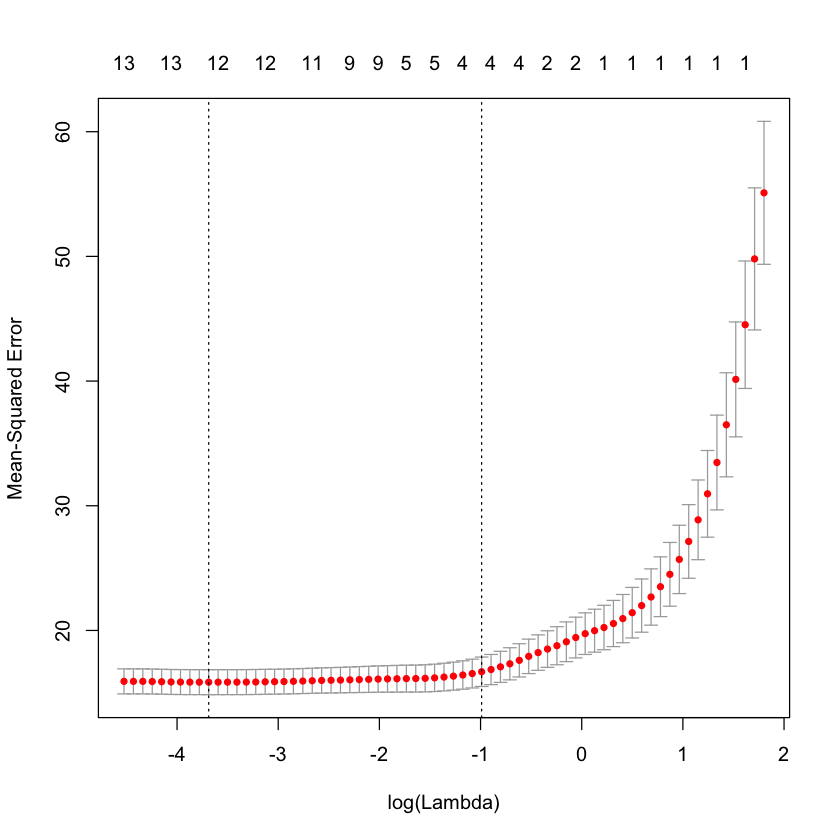

In [139]:
cvlassofit = cv.glmnet(as.matrix(data[,c(-1,-2,-3)]),data[,2],alpha = 1)
plot(cvlassofit)
### The variable we selected
coef(cvlassofit, s = "lambda.1se")
## The lambda we are choosing
cvlassofit$lambda.1se

### Get the R^2
cvlassofit$glmnet.fit$dev.ratio[which(cvlassofit$glmnet.fit$lambda == cvlassofit$lambda.1se)]
cvlassofit$cvm[which(cvlassofit$glmnet.fit$lambda == cvlassofit$lambda.1se)]


We also use lasso to do variable selection. By introducing the penalty term of norm-1, lasso tends to give us a sparse solution which fits our aims of variable selection. 
We use the Rpackage “glmnet” to perfrom the lasso regression in our bodyfat dataset. We use the cross validation to select a good lambda based on the one standard error rule. As can be seen in the plot and summary, we can get the best lambda. And using this lambda, four traits are remained in the model, they are AGE, WEIGHT, ABDOMEN, and WRIST respectively. Compared with previous models performance， we think that previous model is better.

### Integrate five methods above, our final model is : BODYFAT ~ WEIGHT + ABDOMEN .

# 5 Model Diagnosis

In [141]:
require(ggplot2)
cleanbodyfat=read.csv("clean dataset.csv")
model=lm(cleanbodyfat[,2]~cleanbodyfat[,5]+cleanbodyfat[,10])
#1.Residuals vs Fitted values Plot
p1=ggplot(model, aes(.fitted, .resid))+
    geom_point()+
    stat_smooth(method="loess")+
    geom_hline(yintercept=0, col="red", linetype="solid")+
     xlab("Fitted values")+ylab("Residuals")+
     ggtitle("Residuals vs Fitted values Plot")+
     theme_bw()+
    theme(plot.title = element_text(hjust = 0.5))

#2.qq Plot  
p2=ggplot(model, aes(qqnorm(.stdresid)[[1]], .stdresid))+
    geom_point(na.rm = TRUE)+
   geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
    xlab("Theoretical Quantiles")+
    ylab("Standardized Residuals")+
    ggtitle("qq Plot")+
    theme_bw()+
    theme(plot.title = element_text(hjust = 0.5))

 #3.Scale vs Location Plot  
 p3=ggplot(model, aes(.fitted, sqrt(abs(.stdresid))))+
   geom_point(na.rm=TRUE)+
   stat_smooth(method="loess", na.rm = TRUE)+
   xlab("Fitted Value")+
   ylab(expression(sqrt("|Standardized residuals|")))+
   ggtitle("Scale vs Location Plot")+
   theme_bw()+
   theme(plot.title = element_text(hjust = 0.5))

#4. Cook's distance Plot
  p4=ggplot(model, aes(seq_along(.cooksd), .cooksd))+
    geom_bar(stat="identity", position="identity")+
    xlab("Obs. Number")+
    ylab("Cook's distance")+
    ggtitle("Cook's distance Plot")+
    theme_bw()+
    theme(plot.title = element_text(hjust = 0.5))

#5. Residual vs Leverage Plot
  p5=ggplot(model, aes(.hat, .stdresid))+
    geom_point(aes(size=.cooksd), na.rm=TRUE)+
    stat_smooth(method="loess", na.rm=TRUE)+
    xlab("Leverage")+ylab("Standardized Residuals")+
    ggtitle("Residual vs Leverage Plot")+
    scale_size_continuous("Cook's Distance", range=c(1,5))+
    theme_bw()+
    theme(legend.position="bottom")+
    theme(plot.title = element_text(hjust = 0.5))

#6. Cook's distance vs Leverage hii/(1-hii) Plot
  p6=ggplot(model, aes(.hat, .cooksd))+
    geom_point(na.rm=TRUE)+
    stat_smooth(method="loess", na.rm=TRUE)+
    xlab("Leverage hii")+ylab("Cook's Distance")+
    ggtitle("Cook's distance vs Leverage hii/(1-hii) Plot")+
    geom_abline(slope=seq(0,4,0.5), color="red", linetype="dashed")+
    theme_bw()+
    theme(plot.title = element_text(hjust = 0.5))
  
 #library(magrittr)
 #library(multipanelfigure)
 #figure1 <- multi_panel_figure(columns = 3, rows = 2, panel_label_type = "none") 
 #figure1 %<>%
 #  fill_panel(p1, column = 1, row = 1) %<>%
 #  fill_panel(p2, column = 2, row = 1) %<>%
 #  fill_panel(p3, column = 3, row = 1) %<>%
 #  fill_panel(p4, column = 1, row = 2) %<>%
 #  fill_panel(p5, column = 2, row = 2) %<>%
 #  fill_panel(p6, column = 3, row = 2)
 #figure1 

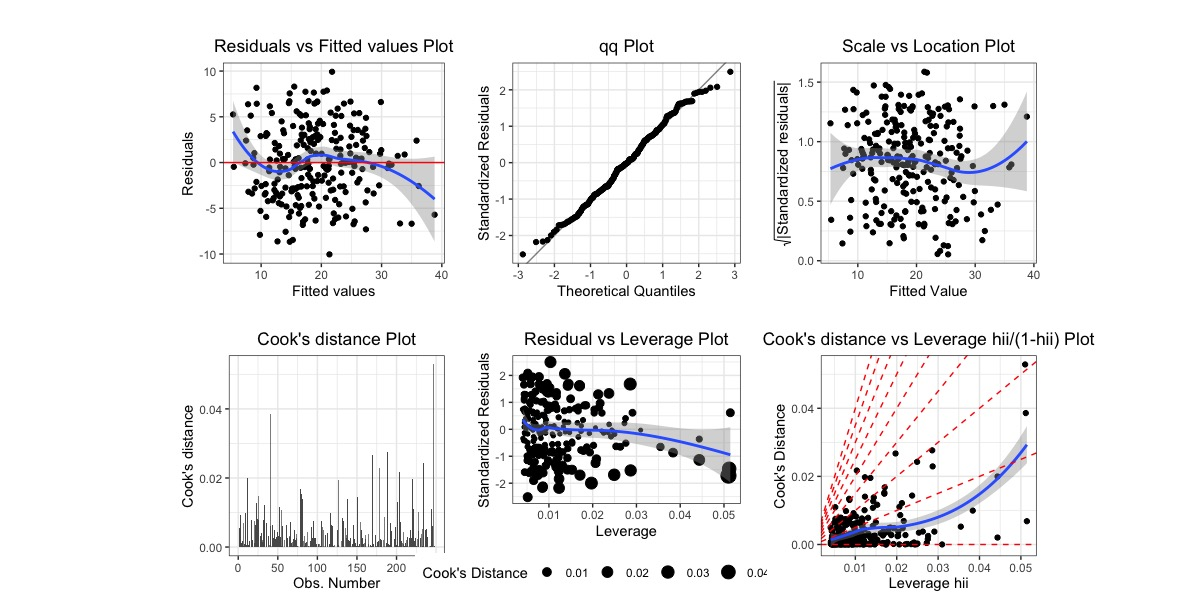

1.It's a linear model obviously from our research above.

2.Residuals seems normal from QQ-Plot to some degree.

3.There are equal variance from Residuals vs Fitted values.

4.Data are independent with each other from Scale vs Location Plot.

# 6 Strength and weekness

### Strength: Our model is simple and linear which is easy to understand and implement and the index such as MSE and R Square are relatively satisfying.
### Weekness: We may ignore the interaction between variables or high order terms.

# 7 Conclusion